In [41]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt




In [42]:

length = 10
#random.seed(10)
times = 5
low_prob = 00
high_prob = 100 + 1
Beta =1000
K = 1 
num_chains = 2
spacing = 10
num_points = int(np.ceil((high_prob-low_prob)/spacing))
time_interval = 10
simulation_time = length**2*2


In [43]:
if (simulation_time) % 10 == 0:
#record = np.zeros([high_prob-low_prob, 1], dtype=float)
    time_size = (simulation_time)//time_interval # number of data points along the time axis

    #record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    #record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    #recordlong = np.zeros((num_points, length, time_size), dtype=float) #[probability, position, time]
    staggeredMagnetization = np.zeros((num_points,time_size), dtype=float)
    #totalparam = np.zeros((num_points,time_size))
    #totrecordlong = np.zeros((num_points, time_size))
    
else: 
    time_size = (simulation_time)//time_interval # number of data points along the time axis

    #record1 = np.zeros([num_points, time_size], dtype=float) #[probability, time]
    #record2 = np.zeros([num_points, time_size], dtype=float)
    recordferro = np.zeros([num_points,time_size], dtype=float) # set up for ferromagnetic order parameter
    #record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
    #recordlong = np.zeros((num_points, length, time_size), dtype=float)
    staggeredMagnetization = np.zeros((num_points,time_size), dtype=float)
    #totalparam = np.zeros((num_points,time_size))
    #totrecordlong = np.zeros((num_points, time_size))


In [44]:
for repeat in range(times):
    rep1 = random.getrandbits(length)
    rep2 = random.getrandbits(length)
    print(bin(rep1),bin(rep2))
    lattice = [format(rep1, '0'+str(length)+'b'), format(rep2, '0'+str(length)+'b')]
                       #format(rep3, '0'+str(length)+'b')]
    recordferro[0, 0] += ((lattice[0].count('1')+lattice[1].count('1')-lattice[0].count('0')-lattice[1].count('0'))/(2*length))/times
    for y in range(length):
        for x in range(num_chains):
            staggeredMagnetization[0, 0] += ((-1)**(x+y+~int(lattice[x][y]))/(2*length))/times

    for i in range((simulation_time)):
        for y_pos in range(0, length): # this section takes about 1/100 s at length = 100, accounts for most of the run time
            for x_pos in range(0, num_chains):
                E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, num_chains==2)
                old = lattice[x_pos]
                # noinspection PyTypeChecker
                lattice[x_pos] = format(int(lattice[x_pos], base=2) ^ (1 << (length - y_pos - 1)), '0' + str(length) + 'b')
                E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, num_chains==2)
                if random.random() <= boltzmann_probability(E_i, E_f, Beta):
                    pass
                else:
                    lattice[x_pos] = old
        if (i%time_interval)==0 and i !=0:
            recordferro[0, i//time_interval] += ((lattice[0].count('1')+lattice[1].count('1')-lattice[0].count('0')-lattice[1].count('0'))/(2*length))/times

            for y in range(length):
                for x in range(num_chains):
                    staggeredMagnetization[0, i//time_interval] += ((-1)**(x+y+~int(lattice[x][y]))/(2*length))/times
            staggeredMagnetization= np.abs(staggeredMagnetization)
            recordferro= np.abs(recordferro)
    print(lattice[0],lattice[1])


0b1101001111 0b110011111
0101101010 1010010101
0b1101000 0b110000001
1001001010 0110110101
0b1000011010 0b1010101000
0101010101 1010101010
0b110100101 0b1100101010
0010110101 1101001010
0b10101100 0b1111101001
1010100110 0101011001


d:\LabResearch\LabResearch\MonteCarloCommands.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(beta * (final - initial)))


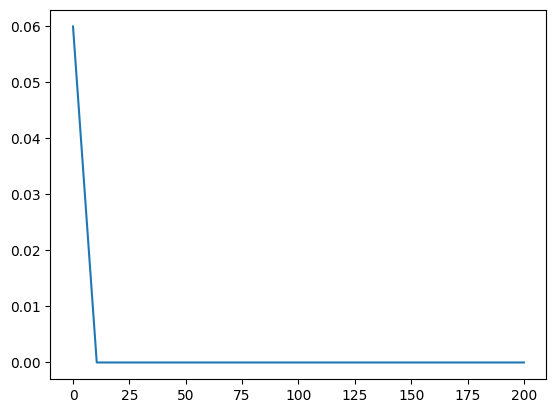

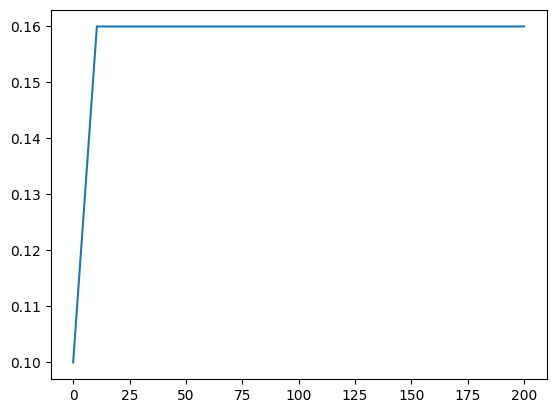

0.16


In [45]:
fig, ax = plt.subplots()
ax.plot( np.linspace(0,simulation_time,time_size), np.abs(recordferro[0,:]), label= "Magnetization")
plt.show()
fig, ax = plt.subplots()
ax.plot( np.linspace(0,simulation_time,time_size), staggeredMagnetization[0,:],  label= "Staggered Magnetization")
plt.show()
#plt.imshow(lattice, cmap='hot',interpolation='nearest')
print(staggeredMagnetization[0,-1])